## 目标

在本教程中，您将学习简单的阈值、自适应阈值、Otsu的二值化等。
你将会学习 cv2.threshold, cv2.adaptiveThreshold 等函数的使用。

## 简单阈值

这个方法是非常直截了当的。如果一个像素值高于阈值时那么它将被赋一个新值（可能是白色），否则就被赋另一个值（可能是黑色）。cv2.threshold函数可以实现这种功能。这个函数的第一个参数是经过处理的原图像，第二个参数是用来给像素值分类的阈值。第三个参数，就是当像素值高于（有时是小于）阈值时应  赋予的新的像素值。OpenCV提供了多种不同的阈值方法，这是由第四个参数决定的。如下：

- cv2.THRESH_BINARY
- cv2.THRESH_BINARY_INV
- cv2.THRESH_TRUNC
- cv2.THRESH_TOZERO
- cv2.THRESH_TOZERO_INV

对于每一种类型，文档中已经解释的很清楚了！（我没搞懂它指的哪份文档。。。）请查看文档。一共将获得两个返回值，第一个是retval函数，我们后面会解释。第二个是我们阈值化的图像。

### 代码

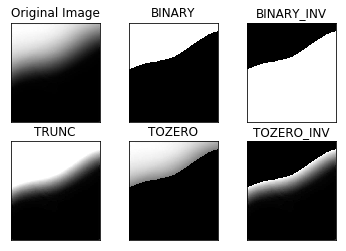

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#此处采用的图片只可以使用含有黑白色的
img = cv2.imread('example.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()


## 自适应阈值

在先前的部分中我们使用全局变量作为阈值，但是这种方式并不适合所有情况，特别是当图像在不同的区域的亮度不同时。在这种情况下，我们将要使用自适应阈值。此时的阈值是根据图像上的每一个小区域计算相应的阈值。因此在同一幅图像上的不同区域采用不同的阈值，从而能够使我们在亮度不同的情况下得到更高的结果。

它有三个指定的参数，一个返回值。
• Adaptive Method- 指定计算阈值的方法
    – cv2.ADPTIVE_THRESH_MEAN_C 阈值取自相邻区域的平均值
    – cv2.ADPTIVE_THRESH_GAUSSIAN_C  阈值取值相邻区域的加权和，权重为一个高斯窗口。
    
• Block Size - 邻域大小，用来计算阈值的区域大小 。

• C -  就是是一个常数，阈值就等于的平均值或者加权平均值减去这个常数。

我们使用下面的代码来展示简单阈值与自适应阈值的差别。

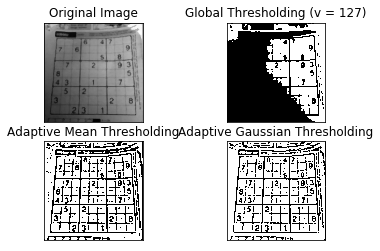

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('dave.png',0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4): 
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray') 
    plt.title(titles[i]) 
    plt.xticks([]),plt.yticks([])
plt.show()

## Otsu的二值化

在第一部分中我们提到  **retVal** 当我们使用 Otsu 二值化时会用到它。那么它到底是什么呢 ？

在使用全局阈值时，我们就是随便给了一个数来做阈值。那我们怎么知道我们选取的这个数的好坏呢？答案就是不停的尝试。如果是一副双峰图像（简单来说双峰图像是指图像直方图中存在两个峰）呢？我们岂不是应在两个峰之间的峰谷选一个值作为阈值？这就是 Otsu 二值化要做的。简单来，就是对一副双峰图像自动根据其直方图计算出一个阈值。 （对于双峰图像，这种方法得到的结果可能会不理想 。）
 
 这里用到的函数还是 cv2.threshold() 但是需要多传入一个参数 （flag）  cv2.THRESH_OTSU。这时把阈值设为为 0。然后算法会找到最优阈值，这个最优阈值就是返回值 **retVal**。如果不使用 Otsu 二值化，返回的 **retVal**值与设定的阈值相等。 
 
 下面的例子中输入图像是一副带有噪声的图像。第一种方法，我们设 127 为全局阈值。第二种方法，我们直接使用 Otsu 二值化。第三种方法，我们先使用一个 5x5 的高斯核除去噪音，然后再使用 Otsu 二值化。看看噪音去除，对结果的影响有多大吧。


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('noisy2.png',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in xrange(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()